The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [78]:
# Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Data

In [79]:
data = pd.read_csv("2019.csv")

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


We can see there are no nulls in each column.

In [81]:
# Checking the overall 
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [82]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. They were asked from a scale of 0 to 10 how happy are their lives. 0 being the worst possible life and 10 being best possible life for them.


In [83]:
# Do we have missing values ?
data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Great we don't have any missing values 

In [84]:
# Checking if we have any unique values 
data.nunique() # Returns number of unique values of each column

Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64

We can see there are no duplicates for Country/Region which is good the the rest that are non unique makes sense.

In [85]:
# Checking How the ranking works.
data.sort_values(by="Score", ascending=False).head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


So we can conclude the ranking is by the happiness score.

In [86]:
data.sort_values(by="Score").head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110


## Overview of the Factors Contributing to the General happiness of the Country.
**Overall rank** – Indicates a country’s position compared to others based on its happiness score (lower rank = higher happiness).

**Country or region** – The specific nation or territory being evaluated.

**Score** – The happiness score itself, which combines all the other factors.

**GDP per capita** – Reflects the average income level; higher income generally allows for better living conditions and contributes positively to happiness.

**Social support** – Measures if people have someone to rely on in times of trouble, which strongly boosts well-being.

**Healthy life expectancy** – Represents how long people live in good health, contributing to a more fulfilling and worry-free life.

**Freedom to make life choices** – Captures how free people feel to make decisions about their lives, which empowers a sense of control and happiness.

**Generosity** – Based on donations and helping others; giving can increase one’s own sense of purpose and social connectedness.

**Perceptions of corruption** – Reflects trust in government and society; lower corruption often means more fairness and stability, which improves happiness.

In [88]:
# Just checking the leading country in terms of Perceptions of corruption in East Africa
east_africa = ['Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi', 'South Sudan', 'Ethiopia', 'Somalia', 'Eritrea']

data[data['Country or region'].isin(east_africa)].sort_values(by="Perceptions of corruption", ascending=False)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
133,134,Ethiopia,4.286,0.336,1.033,0.532,0.344,0.209,0.100
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
135,136,Uganda,4.189,0.332,1.069,0.443,0.356,0.252,0.060
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053


In [89]:
# Checking the Correlation between the correlation 
numeric_data = data.drop(['Country or region'], axis=1)
numeric_data

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [90]:
numeric_data.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


We can see that what contributes greatly to the score of happiness in the Country in order is:
- GDP per capital
- Healthy life expectancy 
- Social Support
- Freedom to make life choices 
- Perceptions of corruption 
- Generosity

Visualizing the Correlation

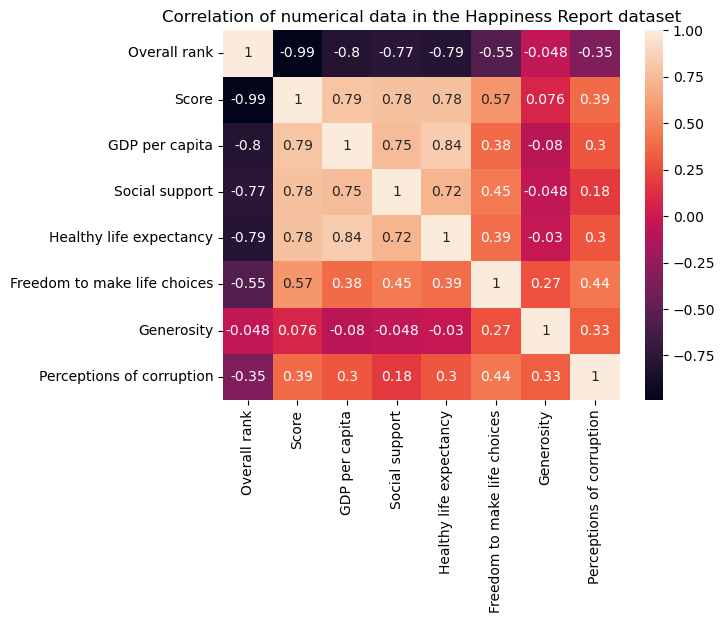

In [91]:
sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation of numerical data in the Happiness Report dataset")
plt.rcParams['figure.figsize']== (28,9)
plt.show()

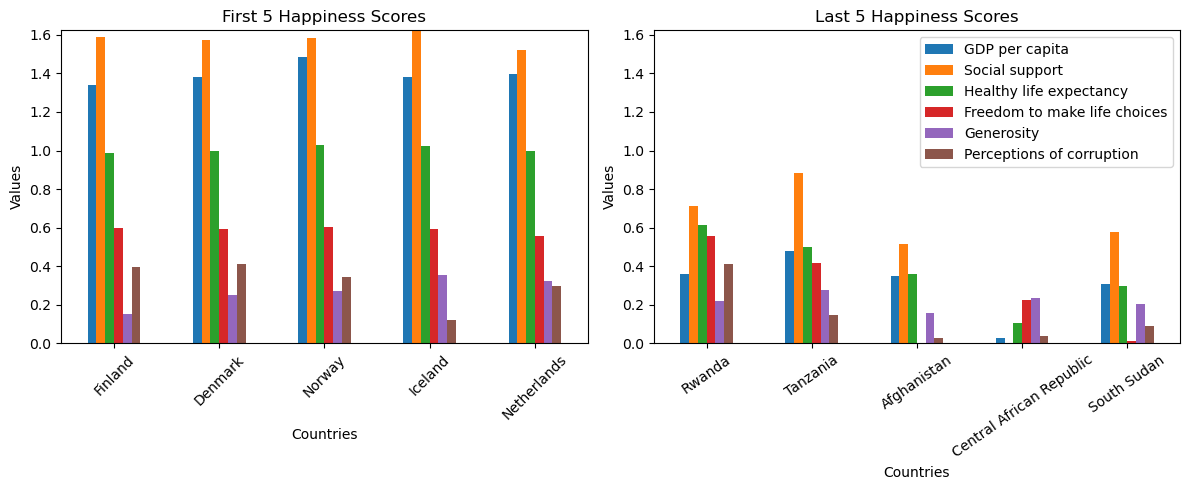

In [119]:
import matplotlib.pyplot as plt

# Subsetting the data
last_5 = data_ind.iloc[-5:, 2:]
first_5 = data_ind.iloc[:5, 2:]

# Set up the side-by-side plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot first 5
first_5.plot(kind="bar", ax=axes[0], title="First 5 Happiness Scores", legend=False, rot=45)
axes[0].set_xlabel("Countries")
axes[0].set_ylabel("Values")

# Plot last 5
last_5.plot(kind="bar", ax=axes[1], title="Last 5 Happiness Scores", legend= True, rot=35)
axes[1].set_xlabel("Countries")
axes[1].set_ylabel("Values")

# Get global y-limits from both subsets
y_min = min(first_5.min().min(), last_5.min().min())
y_max = max(first_5.max().max(), last_5.max().max())

# Apply same y-axis limits
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()



Through this comparison we can clearly tell all factors highlighted contribute to the Happiness Score and therefore all are important.

Plotting all the Factors against the Happiness score

In [123]:
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

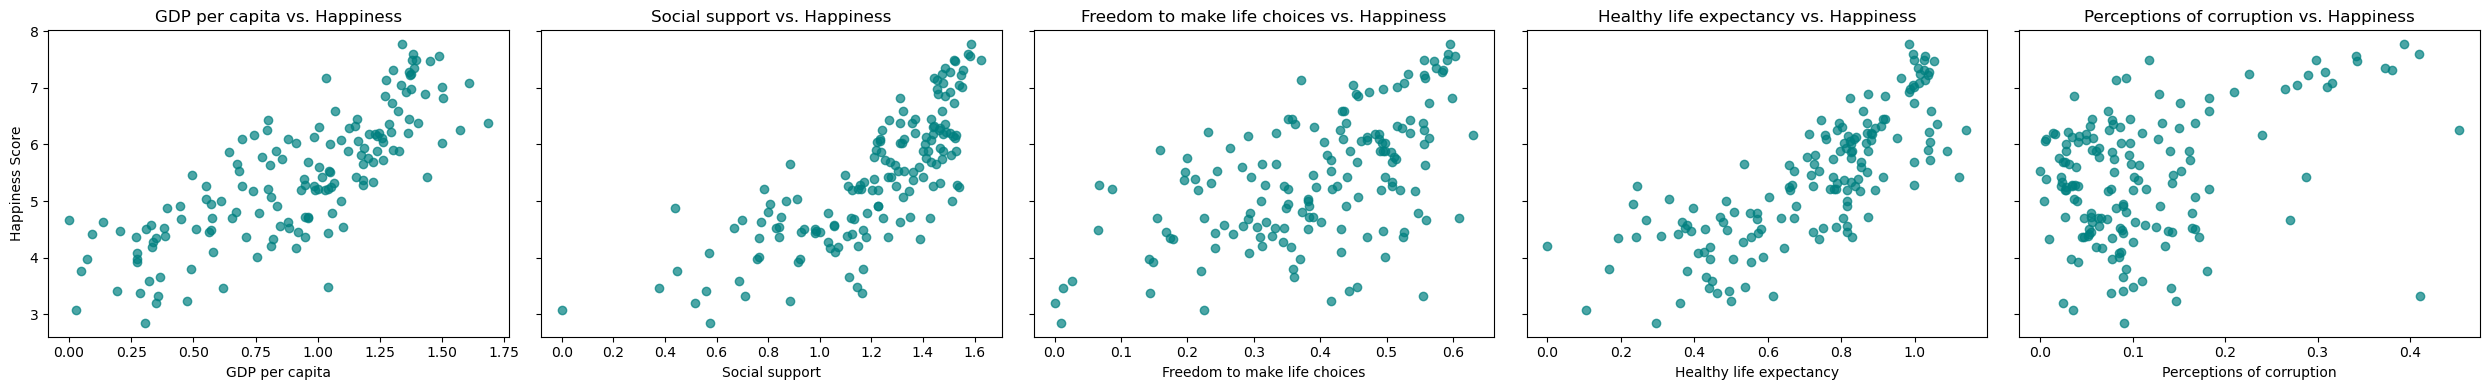

In [128]:
# Define the target and features
happiness_score = data["Score"]
factors = ["GDP per capita", "Social support", "Freedom to make life choices", "Healthy life expectancy", "Perceptions of corruption"]

# Create subplots
fig, axes = plt.subplots(1, len(factors), figsize=(5 * len(factors), 4), sharey=True)

# Loop over each factor and create scatter plots
for i, factor in enumerate(factors):
    axes[i].scatter(data[factor], happiness_score, alpha=0.7, color='teal')
    axes[i].set_xlabel(factor)
    axes[i].set_title(f"{factor} vs. Happiness")
    if i == 0:
        axes[i].set_ylabel("Happiness Score")

plt.tight_layout()
plt.show()